# Занятие 17

## Обнаружение аномалий

### Метод главных компонент
- уменьшеним размерность данных
- восстановим размерность данных

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv(
    "D:\Курсы\Python\Python от основ до машинного обучения\Раздел 2. Библиотеки Python для научных расчетов и машинного обучения\Конспекты и домашние задания\creditcard\creditcard.csv"
)
print(df.head())

legit = df[df["Class"] == 0]
fraud = df[df["Class"] == 1]

legit = legit.drop(["Class", "Time"], axis=1)
fraud = fraud.drop(["Class", "Time"], axis=1)

print(legit.shape)
print(fraud.shape)

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\vov4i\AppData\Local\Temp\ipykernel_11952\1659715098.py:2: SyntaxWarning: invalid escape sequence '\P'
  "D:\Курсы\Python\Python от основ до машинного обучения\Раздел 2. Библиотеки Python для научных расчетов и машинного обучения\Конспекты и домашние задания\creditcard\creditcard.csv"


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

(284315, 26)
(492, 26)
(284315, 29)
(492, 29)


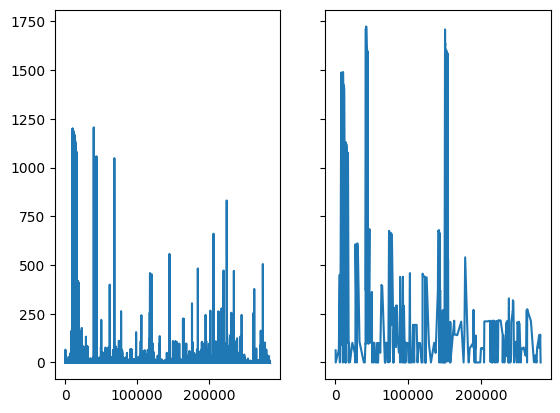

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=26, random_state=0)
legit_pca = pd.DataFrame(pca.fit_transform(legit), index=legit.index)
fraud_pca = pd.DataFrame(pca.transform(fraud), index=fraud.index)

print(legit_pca.shape)
print(fraud_pca.shape)

legit_restore = pd.DataFrame(pca.inverse_transform(legit_pca), index=legit_pca.index)
fraud_restore = pd.DataFrame(pca.inverse_transform(fraud_pca), index=fraud_pca.index)

print(legit_restore.shape)
print(fraud_restore.shape)


import numpy as np


def anomaly_calc(original, restored):
    loss = np.sum((np.array(original) - np.array(restored)) ** 2, axis=1)
    return pd.Series(data=loss, index=original.index)


legit_calc = anomaly_calc(legit, legit_restore)
fraud_calc = anomaly_calc(fraud, fraud_restore)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, sharex="col", sharey="row")
ax[0].plot(legit_calc)
ax[1].plot(fraud_calc)

plt.show()

In [13]:
th = 200

legit_TRUE = legit_calc[legit_calc < th].count()
legit_FALSE = legit_calc[legit_calc >= th].count()

fraud_TRUE = fraud_calc[fraud_calc >= th].count()
fraud_FALSE = fraud_calc[fraud_calc < th].count()

print(legit_TRUE)
print(fraud_TRUE)

print(legit_FALSE)
print(fraud_FALSE)

284239
243
76
249


## Обработка естественного языка NLP
Языковая модель позволяет предсказывать следующее слово, зная предыдущие. Метки не требуются, но нужно очень много текста. Метки получаются автоматически из данных.

In [14]:
from fastai.text.all import *

path = untar_data(URLs.HUMAN_NUMBERS)
print(path.ls())

[Path('C:/Users/vov4i/.fastai/data/human_numbers/train.txt'), Path('C:/Users/vov4i/.fastai/data/human_numbers/valid.txt')]


In [15]:
lines = L()
with open(r"C:\Users\vov4i\.fastai\data\human_numbers\train.txt") as f:
    lines += L(*f.readlines())

print(lines[:10])

text=' '.join([l.strip() for l in lines])
print(text[:50])

tokens=text.split(" ")
print(tokens[:10])

vocab=L(*tokens).unique()
print(vocab[:30])

word2index={w: i for i,w in enumerate(vocab)}
print(word2index)

nums=L(word2index[i] for i in tokens)
print(nums[:30])

['one \n', 'two \n', 'three \n', 'four \n', 'five \n', 'six \n', 'seven \n', 'eight \n', 'nine \n', 'ten \n']
one two three four five six seven eight nine ten e
['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']
['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen', 'seventeen', 'eighteen', 'nineteen', 'twenty', 'thirty', 'forty', 'fifty', 'sixty', 'seventy', 'eighty', 'ninety', 'hundred', 'thousand']
{'one': 0, 'two': 1, 'three': 2, 'four': 3, 'five': 4, 'six': 5, 'seven': 6, 'eight': 7, 'nine': 8, 'ten': 9, 'eleven': 10, 'twelve': 11, 'thirteen': 12, 'fourteen': 13, 'fifteen': 14, 'sixteen': 15, 'seventeen': 16, 'eighteen': 17, 'nineteen': 18, 'twenty': 19, 'thirty': 20, 'forty': 21, 'fifty': 22, 'sixty': 23, 'seventy': 24, 'eighty': 25, 'ninety': 26, 'hundred': 27, 'thousand': 28}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 19, 0, 19, 1, 

1. Список из всех последовательностей из трех слов

In [24]:
seq = L((nums[i : i + 3], nums[i + 3]) for i in range(0, len(nums) - 4, 3))
print(seq[:10])
seq = L((tensor(nums[i : i + 3]), nums[i + 3]) for i in range(0, len(nums) - 4, 3))
print(seq[:10])

[([0, 1, 2], 3), ([3, 4, 5], 6), ([6, 7, 8], 9), ([9, 10, 11], 12), ([12, 13, 14], 15), ([15, 16, 17], 18), ([18, 19, 19], 0), ([0, 19, 1], 19), ([19, 2, 19], 3), ([3, 19, 4], 19)]
[(tensor([0, 1, 2]), 3), (tensor([3, 4, 5]), 6), (tensor([6, 7, 8]), 9), (tensor([ 9, 10, 11]), 12), (tensor([12, 13, 14]), 15), (tensor([15, 16, 17]), 18), (tensor([18, 19, 19]), 0), (tensor([ 0, 19,  1]), 19), (tensor([19,  2, 19]), 3), (tensor([ 3, 19,  4]), 19)]


In [35]:
bs = 64
cut = int(len(seq) * 0.8)
dls = DataLoaders.from_dsets(seq[:cut], seq[cut:], bs=bs, shuff=False)


class Model1(Module):
    def __init__(self, vocab_sz, n_hidden):
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        self.h_h = nn.Linear(n_hidden, n_hidden)
        self.h_o = nn.Linear(n_hidden, vocab_sz)

    def forward(self, x):
        # h = F.relu(self.h_h(self.i_h(x[:, 0])))
        # h = h + self.i_h(x[:, 1])
        # h = F.relu(self.h_h(h))  # h2
        # h = h + self.i_h(x[:, 2])
        # h = F.relu(self.h_h(h))

        h = 0
        for i in range(3):
            h = h + self.i_h(x[:, i])
            h = F.relu(self.h_h(h))
        return self.h_o(h)


learn = Learner(
    dls, Model1(len(vocab), bs), loss_func=F.cross_entropy, metrics=accuracy
)

learn.fit_one_cycle(4, 0.001)

epoch,train_loss,valid_loss,accuracy,time
0,2.324163,2.314705,0.268710,00:01
1,1.781945,2.308381,0.264433,00:01
2,1.708246,2.345184,0.264433,00:01
3,1.692815,2.361239,0.265146,00:01


In [28]:
n = 0
counts = torch.zeros(len(vocab))

for x, y in dls.valid:
    n += y.shape[0]
    for i in range_of(vocab):
        counts[i] += (y == i).long().sum()

print(counts)

index = torch.argmax(counts)

print(index, vocab[index.item()], counts[index].item() / n)

tensor([ 79.,  87.,  70.,  88., 115., 278., 440., 115., 106.,   5.,   5.,   4.,
          5.,   5.,   4.,   5.,   5.,   4.,   5.,  44.,  52.,  53.,  44.,  52.,
         53.,  44.,  52., 472., 515.])
tensor(28) thousand 0.1835352815395581
